In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# special package for performing fourier transformations
from scipy.fft import fft
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
file_path = 'C:\\Users\\Khush Bhuta\\Desktop\\Acads\\3rd Year\\DOP (IoT, Smart Devices)\\Code\\Data\\Devices\\test.csv'
data = pd.read_csv(file_path)

In [3]:
data.shape

(80000, 21)

In [4]:
non_numeric_columns = ['MAC_Src','Label']
data_numeric = data.drop(columns = non_numeric_columns)

In [5]:
numeric_columns = ['Pck_Size','Payload_Len','TCP_Window_Size','Entropy','PortTyp_Src']
print(data_numeric[numeric_columns].dtypes)

Pck_Size             int64
Payload_Len          int64
TCP_Window_Size      int64
Entropy            float64
PortTyp_Src          int64
dtype: object


In [6]:
def apply_fft(df,columns):
    fft_features = pd.DataFrame()
    for col in columns:
        fft_values = np.abs(fft(df[col].values))
        fft_features[col + '_fft'] = fft_values[:len(fft_values)//2]
    return fft_features

In [7]:
fft_data = apply_fft(data,numeric_columns)

In [8]:
fft_data

,Pck_Size_fft,Payload_Len_fft,TCP_Window_Size_fft,Entropy_fft,PortTyp_Src_fft
0,1.110185e+07,7.762930e+06,1.432332e+08,163385.883130,80190.000000
1,6.429792e+05,6.434565e+05,1.428969e+06,13012.204868,53.165149
2,6.460847e+04,6.444687e+04,5.578904e+05,931.151742,23.883558
3,4.810154e+05,4.828268e+05,2.217770e+06,9748.969266,22.133027
4,6.818066e+05,6.846451e+05,1.572890e+06,12721.687026,24.285673
...,...,...,...,...,...
39995,2.620848e+04,2.577751e+04,2.279312e+05,786.119195,30.040384
39996,2.672152e+04,2.650088e+04,1.872699e+05,347.113523,35.175966
39997,1.680820e+04,1.698759e+04,7.580189e+04,461.301963,63.471233
39998,4.594138e+04,4.622428e+04,1.282453e+05,1042.864547,27.438007


In [9]:
df1 = pd.concat([fft_data,data.drop(columns = ['MAC_Src','Label'])],axis = 1)

In [10]:
df1.dropna()

,Pck_Size_fft,Payload_Len_fft,TCP_Window_Size_fft,Entropy_fft,PortTyp_Src_fft,ARP,IP,ICMP6,TCP,UDP,...,SSDP,DNS,MDNS,NTP,PortTyp_Src,PortTyp_Dst,Pck_Size,Pck_Rawdata,Payload_Len,Entropy
0,1.110185e+07,7.762930e+06,1.432332e+08,163385.883130,80190.000000,0,1,0,1,0,...,0,0,0,0,1,2,40,0,0,0.000000
1,6.429792e+05,6.434565e+05,1.428969e+06,13012.204868,53.165149,0,1,0,1,0,...,0,0,0,0,1,2,124,1,84,4.619888
2,6.460847e+04,6.444687e+04,5.578904e+05,931.151742,23.883558,0,1,0,1,0,...,0,0,0,0,1,3,48,0,0,0.000000
3,4.810154e+05,4.828268e+05,2.217770e+06,9748.969266,22.133027,0,1,0,1,0,...,0,0,0,0,1,2,40,0,0,0.000000
4,6.818066e+05,6.846451e+05,1.572890e+06,12721.687026,24.285673,0,1,0,1,0,...,0,0,0,0,1,3,124,1,84,4.619888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2.620848e+04,2.577751e+04,2.279312e+05,786.119195,30.040384,0,1,0,1,0,...,0,0,0,0,1,3,40,0,0,0.000000
39996,2.672152e+04,2.650088e+04,1.872699e+05,347.113523,35.175966,0,1,0,1,0,...,0,0,0,0,1,3,386,1,346,4.898688
39997,1.680820e+04,1.698759e+04,7.580189e+04,461.301963,63.471233,0,1,0,1,0,...,0,0,0,0,1,2,124,1,84,4.643698
39998,4.594138e+04,4.622428e+04,1.282453e+05,1042.864547,27.438007,0,1,0,1,0,...,0,0,0,0,1,2,40,0,0,0.000000


In [11]:
X = df1[['Pck_Size_fft','Payload_Len_fft','TCP_Window_Size_fft','Entropy_fft','PortTyp_Src_fft','Pck_Size','Payload_Len','TCP_Window_Size','PortTyp_Src','Entropy']]
# X = fft_data
y = data['Label']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [13]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [14]:
classifiers = {
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier()
}

In [15]:
# clf_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_split = 10, random_state = 0)
clf_dt = DecisionTreeClassifier(class_weight = None, criterion = 'gini', max_depth = 22,
                                                         max_features = 20, max_leaf_nodes = None,
                                                         min_impurity_decrease = 0.0,
                                                         min_samples_leaf = 1, min_samples_split = 4,
                                                         min_weight_fraction_leaf = 0.0,
                                                         random_state = None, splitter = 'best')
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)

In [16]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test, y_pred, average = 'macro')
recall = metrics.recall_score(y_test, y_pred, average = 'macro')
f1_score = metrics.f1_score(y_test,y_pred,average='macro')

Ensuring Macro Averages of each metric

In [17]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test, y_pred, average = 'macro')
recall = metrics.recall_score(y_test, y_pred, average = 'macro')
f1_score = metrics.f1_score(y_test,y_pred,average='macro')

Evaluation Metrics

In [18]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1_Score: {f1_score:.4f}')

Accuracy: 0.7799
Precision: 0.8139
Recall: 0.7811
F1_Score: 0.7809


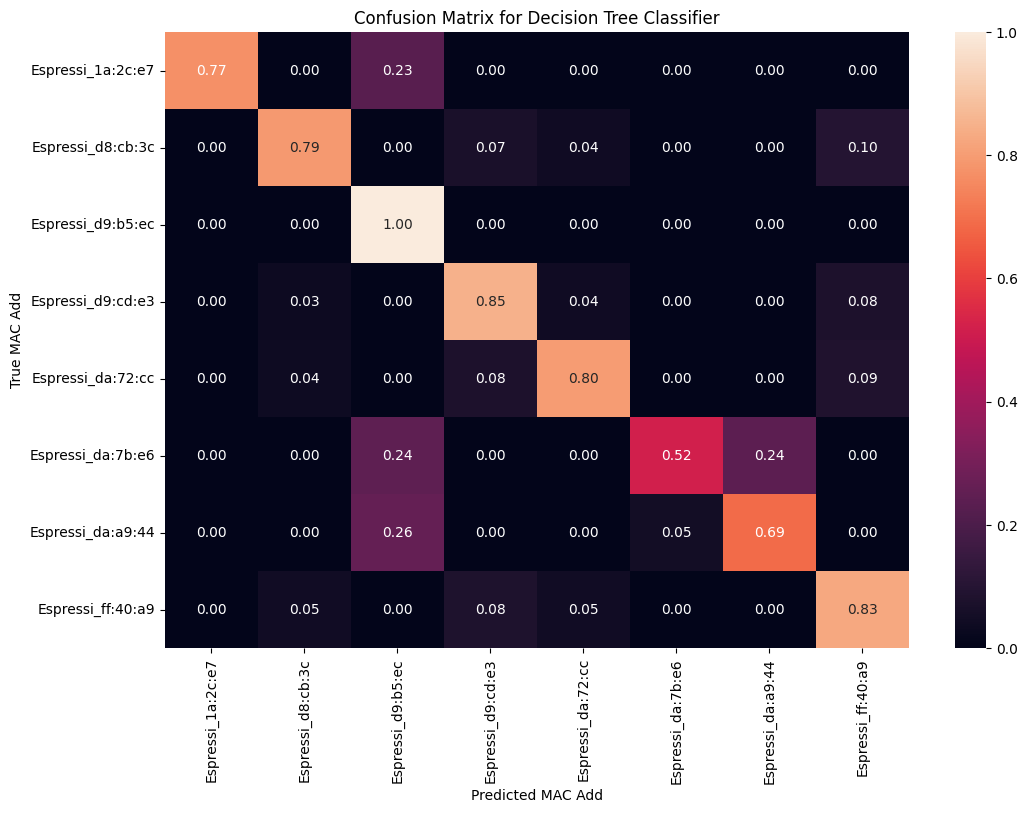

In [19]:
cnf_matrix_dt = metrics.confusion_matrix(y_test,y_pred)
normalized_cnf_matrix_dt = cnf_matrix_dt.astype('float')/cnf_matrix_dt.sum(axis=1)[:,np.newaxis]
plt.figure(figsize=(12,8))
sns.heatmap(normalized_cnf_matrix_dt,annot = True, fmt = '.2f',
           xticklabels = label_encoder.classes_,
           yticklabels = label_encoder.classes_)
plt.xlabel('Predicted MAC Add')
plt.ylabel('True MAC Add')
plt.title(f'Confusion Matrix for Decision Tree Classifier')
plt.show()

In [20]:
# clf_rf = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', max_depth = 15, min_samples_split = 10, random_state = 0)
clf_rf = RandomForestClassifier(bootstrap = True, class_weight = None,
                                                         criterion = 'gini', min_impurity_decrease=0.0,
                                                         min_samples_leaf = 1, min_samples_split = 10,
                                                         min_weight_fraction_leaf = 0.0, n_estimators = 70,
                                                         n_jobs = None, oob_score = False, random_state = None,
                                                         verbose = 0, warm_start = False)
clf_rf.fit(X_train,y_train)
y_pred = clf_rf.predict(X_test)

In [21]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test, y_pred, average = 'macro')
recall = metrics.recall_score(y_test, y_pred, average = 'macro')
f1_score = metrics.f1_score(y_test,y_pred,average='macro')

Evaluation Metrics

In [22]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1_Score: {f1_score:.4f}')

Accuracy: 0.7807
Precision: 0.8140
Recall: 0.7820
F1_Score: 0.7816


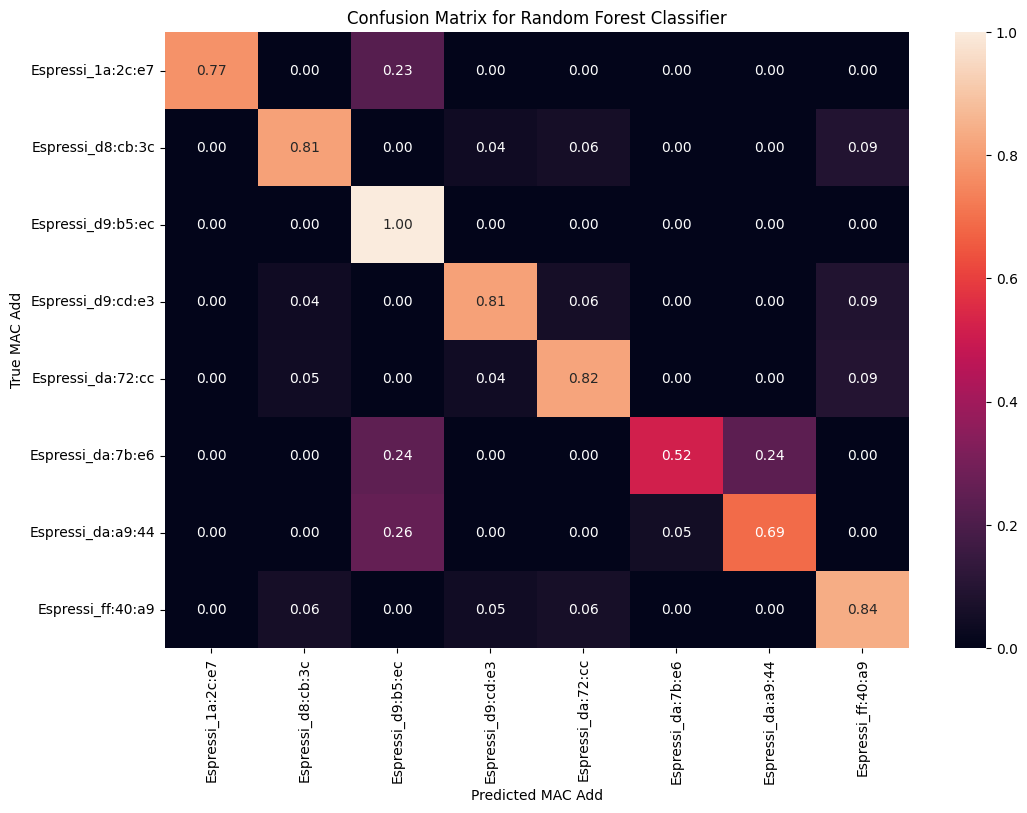

In [23]:
cnf_matrix_rf = metrics.confusion_matrix(y_test,y_pred)
normalized_cnf_matrix_rf = cnf_matrix_rf.astype('float')/cnf_matrix_rf.sum(axis=1)[:,np.newaxis]
plt.figure(figsize=(12,8))
sns.heatmap(normalized_cnf_matrix_rf,annot = True, fmt = '.2f',
           xticklabels = label_encoder.classes_,
           yticklabels = label_encoder.classes_)
plt.xlabel('Predicted MAC Add')
plt.ylabel('True MAC Add')
plt.title(f'Confusion Matrix for Random Forest Classifier')
plt.show()